In [47]:
# for outoreload use
%load_ext autoreload
%autoreload 2
%cd /home/alvarovh/code/cse598_climate_proj/climate-physicsML/final_combined_loss_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/alvarovh/code/cse598_climate_proj/climate-physicsML/final_combined_loss_model


In [48]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [49]:
figures_folder = "/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/nov30_figures"

In [50]:
# experiments_output_dirpath = "/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/Nov24/initiallambdasscaled/results_0.01/"
experiments_output_dirpath =  "/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/Nov30_2230/results_0.01/"
predictions_output_dirpath = "/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/Nov30_2230/predictions/"
# model_paths = glob.glob(experiments_output_dirpath + "*1.keras")

val_variable_metrics_paths = glob.glob(experiments_output_dirpath + "val_variable_metrics*.csv")
train_variable_metrics_paths = glob.glob(experiments_output_dirpath + "train_variable_metrics*.csv")
test_variable_metrics_paths = glob.glob(predictions_output_dirpath + "testper_variable_pbtchmet_*.csv")
prediction_paths = glob.glob(predictions_output_dirpath + "testpreds_*.npz")

batch_val_log_paths = glob.glob(experiments_output_dirpath + "batch_val_log*.csv")
batch_train_log_paths = glob.glob(experiments_output_dirpath + "batch_train_log*.csv")


In [51]:
experiments_log_paths = glob.glob(experiments_output_dirpath + "../*.log")
experiments_log_paths

# lets get the model names from the experiments_log_paths. The log file has a bunch of lines, but we need the one that contains the substring "epoch_1.keras"

model_paths = []
for log_path in experiments_log_paths:
    found_it = False
    with open(log_path, "r") as log_file:
        for line in log_file:
            if "epoch_1.keras" in line:
                model_paths.append(line.split(" ")[3])
                found_it = True
                break
    if not found_it:
        model_paths.append("NOT FOUND")

experiment_names = [os.path.basename(experiments_log_paths[i]).replace(".log","") for i in range(len(experiments_log_paths))]
model_basenames = [os.path.basename(model_paths[i]) for i in range(len(model_paths))]
len(experiment_names), len(model_basenames)

models_df = pd.DataFrame({"experiment_name": experiment_names, "model_path": model_paths, "model_basename": model_basenames})




In [52]:
# filter out NO FOUND in model_paths
models_df = models_df[models_df["model_path"] != "NOT FOUND"].reset_index(drop=True)
models_df

,experiment_name,model_path,model_basename
0,constant_nonneg_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
1,zero_model,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
2,constant_radiation_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
3,constant_mass_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...
4,constant_mass_sf0.5,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...
5,constant_lambdas_str,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_constant_mass_constant_nonn...
6,constant_nonneg_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
7,constant_radiation_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
8,constant_radiation_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
9,constant_nonneg_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...


In [53]:

string_identifiers = []
for i in range(len(models_df["model_basename"])):
    # print(models_df["model_basename"][i])
    model_basename = models_df["model_basename"][i]
    lambda_ = model_basename.split("best_model_lambdas_")[1].split("_datafrac_")[0]
    # print(lambda_)
    string_identifiers.append(lambda_)

models_df["string_identifier"] = string_identifiers

In [54]:
for i in range(len(models_df)):
#     val_variable_metrics_paths = glob.glob(experiments_output_dirpath + "val_variable_metrics*.csv")
# train_variable_metrics_paths = glob.glob(experiments_output_dirpath + "train_variable_metrics*.csv")

# batch_val_log_paths = glob.glob(experiments_output_dirpath + "batch_val_log*.csv")
# batch_train_log_paths = glob.glob(experiments_output_dirpath + "batch_train_log*.csv")
    # lets add the batch_val, batch_train, val_variable, train_variable metrics paths to the dataframe
    # we have to search on them using the string_identifier, if we find them, we add them to the dataframe in that row
    string_identifier = models_df["string_identifier"][i]
    # between val_variable_metrics_lambdas_ and _datafrac_
    val_variable_metrics_path = [path for path in val_variable_metrics_paths if string_identifier == path.split("val_variable_metrics_lambdas_")[1].split("_datafrac_")[0]]
    train_variable_metrics_path = [path for path in train_variable_metrics_paths if string_identifier == path.split("train_variable_metrics_lambdas_")[1].split("_datafrac_")[0]]
    batch_val_log_path = [path for path in batch_val_log_paths if string_identifier == path.split("batch_val_log_lambdas_")[1].split("_datafrac_")[0]]
    batch_train_log_path = [path for path in batch_train_log_paths if string_identifier == path.split("batch_train_log_lambdas_")[1].split("_datafrac_")[0]]
    test_variable_metrics_path = [path for path in test_variable_metrics_paths if string_identifier == path.split("testper_variable_pbtchmet_")[1].split("_datafrac_")[0]]
    predictions_path = [path for path in prediction_paths if string_identifier == path.split("testpreds_")[1].split("_datafrac_")[0]]

    if len(val_variable_metrics_path) == 1:
        models_df.at[i, "val_variable_metrics_path"] = val_variable_metrics_path[0]
    elif len(val_variable_metrics_path) > 1:
        print("More than one val_variable_metrics_path found for string_identifier: ", string_identifier)
        print([os.path.basename(i) for i in val_variable_metrics_path])

    if len(train_variable_metrics_path) == 1:
        models_df.at[i, "train_variable_metrics_path"] = train_variable_metrics_path[0]
    if len(batch_val_log_path) == 1:
        models_df.at[i, "batch_val_log_path"] = batch_val_log_path[0]
    if len(batch_train_log_path) == 1:
        models_df.at[i, "batch_train_log_path"] = batch_train_log_path[0]
    if len(test_variable_metrics_path) == 1:
        models_df.at[i, "testmet_path"] = test_variable_metrics_path[0]
    else:
        print("No testmet_path found for string_identifier: ", string_identifier)
    if len(predictions_path) == 1:
        models_df.at[i, "predictions_path"] = predictions_path[0]
        

In [55]:
def get_batch_train_log(models_df, experiment_name):
    batch_train_log_path = models_df[models_df["experiment_name"] == experiment_name]["batch_train_log_path"].values[0]
    batch_train_log = pd.read_csv(batch_train_log_path)
    batch_train_log = batch_train_log[batch_train_log["epoch"] == 1]
    return batch_train_log

def get_batch_val_log(models_df, experiment_name):
    batch_val_log_path = models_df[models_df["experiment_name"] == experiment_name]["batch_val_log_path"].values[0]
    batch_val_log = pd.read_csv(batch_val_log_path)
    batch_val_log = batch_val_log[batch_val_log["epoch"] == 1]
    return batch_val_log

def get_val_variable_metrics(models_df, experiment_name):
    val_variable_metrics_path = models_df[models_df["experiment_name"] == experiment_name]["val_variable_metrics_path"].values[0]
    val_variable_metrics = pd.read_csv(val_variable_metrics_path)
    val_variable_metrics = val_variable_metrics[val_variable_metrics["epoch"] == 1]
    return val_variable_metrics

def get_test_variable_metrics(models_df, experiment_name):
    variable_metrics_path = models_df[models_df["experiment_name"] == experiment_name]["testmet_path"].values[0]
    # get unique
    # print(variable_metrics_path)
    variable_metrics_path = pd.read_csv(variable_metrics_path)
    # print(variable_metrics_path.columns)
    # val_variable_metrics = val_variable_metrics[val_variable_metrics["epoch"] == 1]
    return variable_metrics_path

def get_train_variable_metrics(models_df, experiment_name):
    train_variable_metrics_path = models_df[models_df["experiment_name"] == experiment_name]["train_variable_metrics_path"].values[0]
    train_variable_metrics = pd.read_csv(train_variable_metrics_path)
    train_variable_metrics = train_variable_metrics[train_variable_metrics["epoch"] == 1]
    return train_variable_metrics

def get_predictions(models_df, experiment_name):
    predictions_path = models_df[models_df["experiment_name"] == experiment_name]["predictions_path"].values[0]
    predictions = np.load(predictions_path)
    return predictions

In [56]:
get_test_variable_metrics(models_df, "zero_model")

,batch,variable_name,mae,mse
0,1,ptend_t,0.041624,0.002324
1,1,ptend_q0001,0.064962,0.011545
2,1,ptend_q0002,0.022814,0.004395
3,1,ptend_q0003,0.000001,0.000000
4,1,ptend_u,0.007374,0.000145
...,...,...,...,...
2299,144,cam_out_SOLL,0.307922,0.216460
2300,144,cam_out_SOLSD,0.496505,0.283841
2301,144,cam_out_SOLLD,0.464885,0.276097
2302,144,state_t,2.112278,6.907182


In [57]:
# ['epoch', 'batch', 'loss', 'mae', 'mse', 'mass_loss', 'radiation_loss','nonneg_loss', 'lambda_mass', 'lambda_radiation', 'lambda_nonneg']
# aesthetic_names_for_plotting = ["Epoch", "Batch", "Loss (log scale)", "MAE (log scale)", "MSE (log scale)", "Mass Loss (log scale)", "Radiation Loss (log scale)", "Nonneg Loss (log scale)", "Lambda Mass", "Lambda Radiation", "Lambda Nonneg"]
# lets make it a dict so it is easier to use:
asesthetic_names_for_plotting_dict = {
    "epoch": "Epoch",
    "batch": "Batch",
    "loss": "Loss (log scale)",
    "mae": "MAE (log scale)",
    "mse": "MSE (log scale)",
    "mass_loss": "Mass Loss (log scale)",
    "radiation_loss": "Radiation Loss (log scale)",
    "nonneg_loss": "Nonneg Loss (log scale)",
    "lambda_mass": "Mass λ",
    "lambda_radiation": "Radiation λ",
    "lambda_nonneg": "Nonneg λ"
}

In [58]:
def plot_batch_train_val_loss_acc(batch_train_log, variables=["loss"], save_path=None):
    # for variable in variables:
    #     plt.plot(batch_train_log["batch"], batch_train_log[variable], label=variable)
    # they dont share units, so we need to plot them separately
    # compute how many rows and columns depending on how many variables we have
    nrows = len(variables)
    ncols = 1
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 2.5*nrows))
    for i, variable in enumerate(variables):
        # use better color for the lines
        axs[i].plot(batch_train_log["batch"], batch_train_log[variable], label=variable, color="black")
        # axs[i].set_title(variable)
        axs[i].set_xlabel("batch")
        if variable == "loss":
            axs[i].set_yscale("log")
        axs[i].set_ylabel(asesthetic_names_for_plotting_dict[variable])
        # axs[i].legend()

    # plt.legend() lets remove the legend:
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


In [59]:
models_df

,experiment_name,model_path,model_basename,string_identifier,val_variable_metrics_path,train_variable_metrics_path,batch_val_log_path,batch_train_log_path,testmet_path,predictions_path
0,constant_nonneg_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_constant_mass...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
1,zero_model,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_excluded_nonn...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
2,constant_radiation_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...,excluded_mass_excluded_nonneg_constant_mass_co...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
3,constant_mass_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...,excluded_radiation_excluded_nonneg_constant_ma...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
4,constant_mass_sf0.5,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...,excluded_radiation_excluded_nonneg_constant_ma...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
5,constant_lambdas_str,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_constant_mass_constant_nonn...,constant_mass_constant_nonneg_constant_radiati...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
6,constant_nonneg_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_constant_mass...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
7,constant_radiation_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...,excluded_mass_excluded_nonneg_constant_mass_co...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
8,constant_radiation_sf0.25,/nf

# Plots

In [60]:
# make dir in case it does not exist figures_folder
os.makedirs(figures_folder, exist_ok=True)

In [61]:
figures_folder

'/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/nov30_figures'

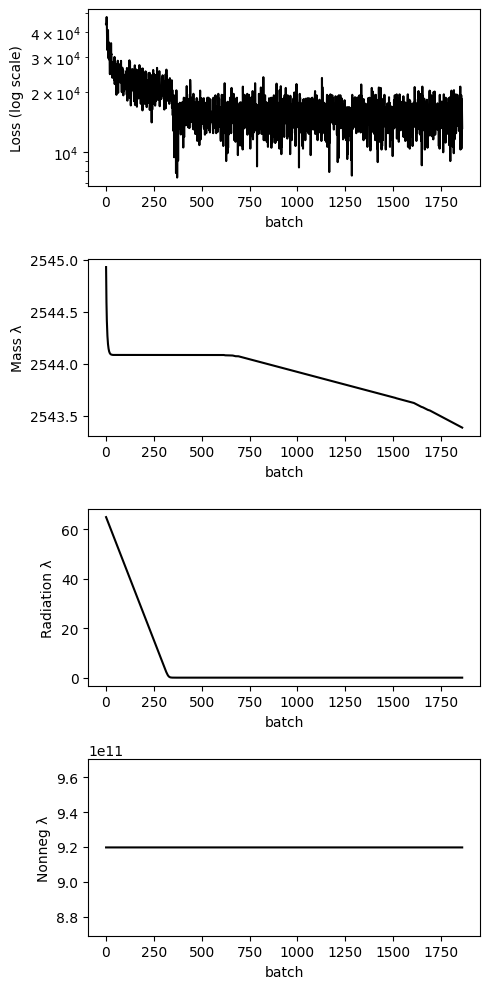

In [62]:
# Let's try getting the results for the zero model
experiment_name = "zero_model"
# experiment_name = experiment_names[5]
batch_train_log = get_batch_train_log(models_df, experiment_name)
batch_val_log = get_batch_val_log(models_df, experiment_name)
val_variable_metrics = get_val_variable_metrics(models_df, experiment_name)
train_variable_metrics = get_train_variable_metrics(models_df, experiment_name)
test_variable_metrics = get_test_variable_metrics(models_df, experiment_name)

# plot_batch_train_val_loss_acc(get_batch_train_log(models_df, "zero_model"), variables=["loss"])

experiment_name = "train_all_lambdas"
plot_batch_train_val_loss_acc(get_batch_train_log(models_df, experiment_name), variables=["loss", "lambda_mass","lambda_radiation","lambda_nonneg"], save_path=f"{figures_folder}/{experiment_name}_lossVSlambda.png")

In [63]:
# # ['constant_nonneg_sf0.25',
# #  'zero_model',
# #  'constant_radiation_sf0.05',
# #  'constant_mass_sf0.05',
# #  'constant_mass_sf0.5',
# #  'constant_lambdas_str',
# #  'constant_nonneg_sf0.05',
# #  'constant_radiation_sf1',
# #  'constant_radiation_sf0.25',
# #  'constant_nonneg_sf1',
# #  'trainable_lambdas_radiation',
# #  'trainable_lambdas_mass',
# #  'constant_mass_sf1',
# #  'constant_nonneg_sf0.5',
# #  'constant_radiation_sf0.5',
# #  'train_all_lambdas',
# #  'constant_mass_sf0.25',
# #  'trainable_lambdas_nonneg']
# lets make it a dict, more useful:
experiment_names_aesthetic_dict = {
    "constant_nonneg_sf0.25": "Nonneg λ=0.25",
    "zero_model": "Zero Model",
    "constant_radiation_sf0.05": "Radiation λ=0.05",
    "constant_mass_sf0.05": "Mass λ=0.05",
    "constant_mass_sf0.5": "Mass λ=0.5",
    "constant_lambdas_str": "All λs=1",
    "constant_nonneg_sf0.05": "Nonneg λ=0.05",
    "constant_radiation_sf1": "Radiation λ=1",
    "constant_radiation_sf0.25": "Radiation λ=0.25",
    "constant_nonneg_sf1": "Nonneg λ=1",
    "trainable_lambdas_radiation": "Trainable Radiation λ",
    "trainable_lambdas_mass": "Trainable Mass λ",
    "constant_mass_sf1": "Mass λ=1",
    "constant_nonneg_sf0.5": "Nonneg λ=0.5",
    "constant_radiation_sf0.5": "Radiation λ=0.5",
    "train_all_lambdas": "Train All λs",
    "constant_mass_sf0.25": "Mass λ=0.25",
    "trainable_lambdas_nonneg": "Trainable Nonneg λ",
}

In [64]:
#see if we included all experiment_names
np.array(list(experiment_names_aesthetic_dict.keys())),models_df["experiment_name"].values


(array(['constant_nonneg_sf0.25', 'zero_model',
        'constant_radiation_sf0.05', 'constant_mass_sf0.05',
        'constant_mass_sf0.5', 'constant_lambdas_str',
        'constant_nonneg_sf0.05', 'constant_radiation_sf1',
        'constant_radiation_sf0.25', 'constant_nonneg_sf1',
        'trainable_lambdas_radiation', 'trainable_lambdas_mass',
        'constant_mass_sf1', 'constant_nonneg_sf0.5',
        'constant_radiation_sf0.5', 'train_all_lambdas',
        'constant_mass_sf0.25', 'trainable_lambdas_nonneg'], dtype='<U27'),
 array(['constant_nonneg_sf0.25', 'zero_model',
        'constant_radiation_sf0.05', 'constant_mass_sf0.05',
        'constant_mass_sf0.5', 'constant_lambdas_str',
        'constant_nonneg_sf0.05', 'constant_radiation_sf1',
        'constant_radiation_sf0.25', 'constant_nonneg_sf1',
        'trainable_lambdas_radiation', 'trainable_lambdas_mass',
        'constant_mass_sf1', 'constant_nonneg_sf0.5',
        'constant_radiation_sf0.5', 'train_all_lambdas',
    

## Variable mse: status_t

In [65]:
get_test_variable_metrics(models_df,"trainable_lambdas_mass")

,batch,variable_name,mae,mse
0,1,ptend_t,0.041624,0.002324
1,1,ptend_q0001,0.064962,0.011545
2,1,ptend_q0002,0.022814,0.004395
3,1,ptend_q0003,0.000001,0.000000
4,1,ptend_u,0.007374,0.000145
...,...,...,...,...
2299,144,cam_out_SOLL,0.307922,0.216460
2300,144,cam_out_SOLSD,0.496505,0.283841
2301,144,cam_out_SOLLD,0.464885,0.276097
2302,144,state_t,2.628393,10.675959


In [66]:
# experiment_names

get_val_variable_metrics(models_df,"trainable_lambdas_mass")


,epoch,batch,variable_name,mae,mse
0,1,1,ptend_t,0.062616,0.006731
1,1,1,ptend_q0001,0.084142,0.016919
2,1,1,ptend_q0002,0.003296,0.000089
3,1,1,ptend_q0003,0.001347,0.000011
4,1,1,ptend_u,0.007290,0.000153
...,...,...,...,...,...
1531,1,96,cam_out_SOLL,0.269112,0.299924
1532,1,96,cam_out_SOLSD,0.186494,0.112269
1533,1,96,cam_out_SOLLD,0.159060,0.109169
1534,1,96,state_t,3.407014,13.498823


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic Mapping Dictionary
experiment_names_aesthetic_dict = {
    "constant_nonneg_sf0.25": "Nonneg λ=0.25",
    "zero_model": "Pure MSE",
    "constant_radiation_sf0.05": "Energy λ=0.05",
    "constant_mass_sf0.05": "Mass λ=0.05",
    "constant_mass_sf0.5": "Mass λ=0.5",
    "constant_lambdas_str": "All λs=1",
    "constant_nonneg_sf0.05": "Nonneg λ=0.05",
    "constant_radiation_sf1": "Energy λ=1",
    "constant_radiation_sf0.25": "Energy λ=0.25",
    "constant_nonneg_sf1": "Nonneg λ=1",
    "trainable_lambdas_radiation": "Energy trainable λ",
    "trainable_lambdas_mass": "Mass trainable λ",
    "constant_mass_sf1": "Mass λ=1",
    "constant_nonneg_sf0.5": "Nonneg λ=0.5",
    "constant_radiation_sf0.5": "Energy λ=0.5",
    "train_all_lambdas": "Train all λs",
    "constant_mass_sf0.25": "Mass λ=0.25",
    "trainable_lambdas_nonneg": "Nonneg trainable λ"
}

def plot_variable_metrics_comparison_boxplot(variable_metrics_list, experiment_names, variable_name, custom_y_label=None, figures_folder=None, label=None):
    """
    Plots boxplots of MSE for a specific variable across different experiments,
    ordered from highest to lowest average MSE.

    Parameters:
    - variable_metrics_list: List of pandas DataFrames containing validation metrics.
    - experiment_names: List of experiment names corresponding to each DataFrame.
    - variable_name: The name of the variable to plot metrics for.
    - custom_y_label: Optional. Custom label for the y-axis.
    """

    # Validation: Ensure matching lengths
    if len(variable_metrics_list) != len(experiment_names):
        raise ValueError("The length of variable_metrics_list and experiment_names must be the same.")

    # Assign original experiment names to each DataFrame
    for i in range(len(variable_metrics_list)):
        variable_metrics_list[i] = variable_metrics_list[i].copy()  # Avoid SettingWithCopyWarning
        variable_metrics_list[i]["experiment_name"] = experiment_names[i]

    # Concatenate all DataFrames
    all_variable_metrics = pd.concat(variable_metrics_list, ignore_index=True)

    # Filter for the specified variable
    filtered_metrics = all_variable_metrics[
        (all_variable_metrics["variable_name"] == variable_name)
    ]
    # Filter for epoch 1
    if "epoch" in filtered_metrics.columns:
        filtered_metrics = filtered_metrics[filtered_metrics["epoch"] == 1]

    # Check if any data is available after filtering
    if filtered_metrics.empty:
        raise ValueError(f"No data found for variable '{variable_name}' at epoch 1.")

    # Calculate average MSE for each experiment
    avg_mse_per_experiment = filtered_metrics.groupby("experiment_name")["mse"].mean().reset_index()

    # Sort experiments from highest to lowest average MSE
    avg_mse_sorted = avg_mse_per_experiment.sort_values(by="mse", ascending=False).reset_index(drop=True)
    sorted_experiment_names = avg_mse_sorted["experiment_name"].tolist()

    # Map sorted experiment names to aesthetic labels
    sorted_experiment_aesthetics = []
    for exp in sorted_experiment_names:
        aesthetic_name = experiment_names_aesthetic_dict.get(exp, exp)  # Use original name if not found
        if aesthetic_name == exp:
            print(f"Warning: '{exp}' not found in aesthetic mapping. Using original name.")
        sorted_experiment_aesthetics.append(aesthetic_name)

    # Map all experiment names in the data to aesthetic labels
    filtered_metrics["experiment_name_aesthetic"] = filtered_metrics["experiment_name"].map(experiment_names_aesthetic_dict)
    
    # Handle unmapped experiment names
    unmapped = filtered_metrics["experiment_name_aesthetic"].isnull()
    if unmapped.any():
        missing_experiments = filtered_metrics[unmapped]["experiment_name"].unique()
        print(f"Warning: The following experiments are missing in the aesthetic mapping and will retain their original names: {missing_experiments}")
        filtered_metrics.loc[unmapped, "experiment_name_aesthetic"] = filtered_metrics.loc[unmapped, "experiment_name"]

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.boxplot(
        x="experiment_name_aesthetic", 
        y="mse", 
        data=filtered_metrics, 
        order=sorted_experiment_aesthetics, 
        # color="blue"
    )
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.xlabel("Experiment name", fontsize=14)
    if custom_y_label:
        plt.ylabel(custom_y_label, fontsize=14)
    else:
        plt.ylabel("MSE (log scale)", fontsize=14)
    plt.yscale("log")
    # plt.title(f"MSE for Variable: {variable_name}", fontsize=16)
    plt.tight_layout()
    if label:
        basename = f'{label}_{variable_name}_mse_comparison.png'
    else:
        basename = f'{variable_name}_mse_comparison.png'

    figure_path = f"{figures_folder}/{basename}" if figures_folder else basename
    plt.savefig(figure_path, dpi=300)
    plt.show()

    return filtered_metrics


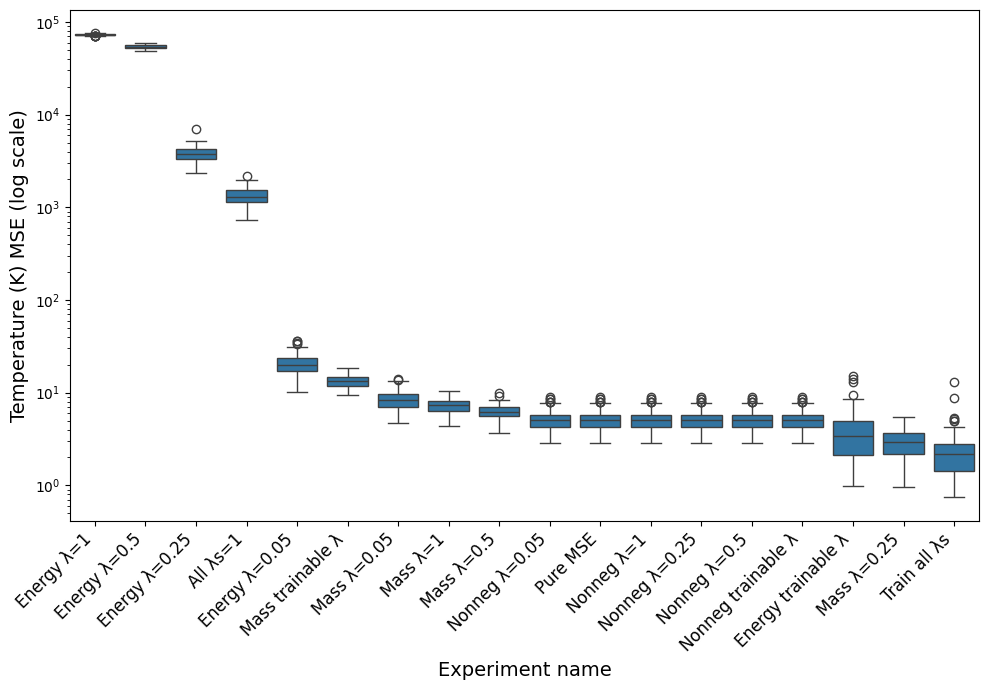

In [68]:

val_variable_metrics_list = [get_val_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]
val_all_variable_metrics = plot_variable_metrics_comparison_boxplot(
    val_variable_metrics_list, 
    experiment_names, 
    "state_t", 
    custom_y_label="Temperature (K) MSE (log scale)",
    figures_folder=figures_folder,
    label="val"
)



/tmp/ipykernel_3163390/3548597592.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metrics["experiment_name_aesthetic"] = filtered_metrics["experiment_name"].map(experiment_names_aesthetic_dict)


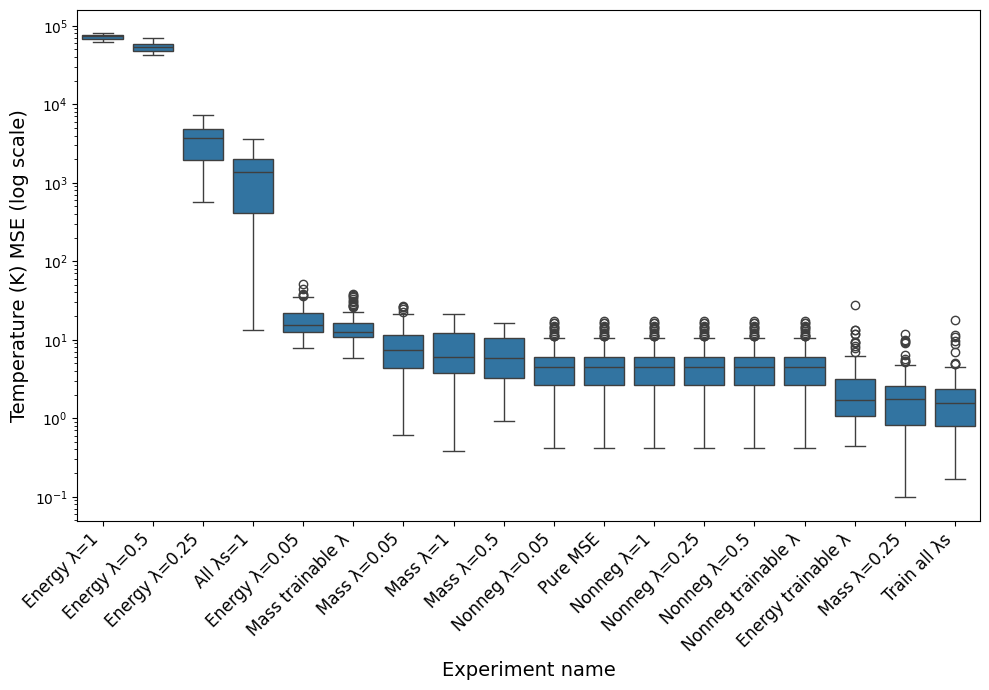

In [69]:
test_variable_metrics_list = [get_test_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]
test_all_variable_metrics = plot_variable_metrics_comparison_boxplot(
    test_variable_metrics_list, 
    experiment_names, 
    "state_t", 
    custom_y_label="Temperature (K) MSE (log scale)",
    figures_folder=figures_folder,
    label="test"
)

In [70]:
all_variable_metrics = test_all_variable_metrics.copy()

all_variable_metrics["experiment_name"] = all_variable_metrics["experiment_name"].map(experiment_names_aesthetic_dict)

In [71]:
all_variable_metrics

,batch,variable_name,mae,mse,experiment_name,experiment_name_aesthetic
14,1,state_t,0.563429,0.464756,Nonneg λ=0.25,Nonneg λ=0.25
30,2,state_t,0.673118,0.532937,Nonneg λ=0.25,Nonneg λ=0.25
46,3,state_t,1.770560,4.341079,Nonneg λ=0.25,Nonneg λ=0.25
62,4,state_t,1.424299,3.764095,Nonneg λ=0.25,Nonneg λ=0.25
78,5,state_t,1.962471,4.688692,Nonneg λ=0.25,Nonneg λ=0.25
...,...,...,...,...,...,...
41406,140,state_t,1.900554,5.336521,Nonneg trainable λ,Nonneg trainable λ
41422,141,state_t,3.767081,16.545631,Nonneg trainable λ,Nonneg trainable λ
41438,142,state_t,2.304022,7.364347,Nonneg trainable λ,Nonneg trainable λ
41454,143,state_t,2.145333,7.577876,Nonneg trainable λ,Nonneg trainable λ


In [72]:
experiment_names

['constant_nonneg_sf0.25',
 'zero_model',
 'constant_radiation_sf0.05',
 'constant_mass_sf0.05',
 'constant_mass_sf0.5',
 'constant_lambdas_str',
 'constant_nonneg_sf0.05',
 'constant_radiation_sf1',
 'constant_radiation_sf0.25',
 'constant_nonneg_sf1',
 'trainable_lambdas_radiation',
 'trainable_lambdas_mass',
 'constant_mass_sf1',
 'constant_nonneg_sf0.5',
 'constant_radiation_sf0.5',
 'train_all_lambdas',
 'constant_mass_sf0.25',
 'trainable_lambdas_nonneg']

In [73]:
all_variable_metrics

,batch,variable_name,mae,mse,experiment_name,experiment_name_aesthetic
14,1,state_t,0.563429,0.464756,Nonneg λ=0.25,Nonneg λ=0.25
30,2,state_t,0.673118,0.532937,Nonneg λ=0.25,Nonneg λ=0.25
46,3,state_t,1.770560,4.341079,Nonneg λ=0.25,Nonneg λ=0.25
62,4,state_t,1.424299,3.764095,Nonneg λ=0.25,Nonneg λ=0.25
78,5,state_t,1.962471,4.688692,Nonneg λ=0.25,Nonneg λ=0.25
...,...,...,...,...,...,...
41406,140,state_t,1.900554,5.336521,Nonneg trainable λ,Nonneg trainable λ
41422,141,state_t,3.767081,16.545631,Nonneg trainable λ,Nonneg trainable λ
41438,142,state_t,2.304022,7.364347,Nonneg trainable λ,Nonneg trainable λ
41454,143,state_t,2.145333,7.577876,Nonneg trainable λ,Nonneg trainable λ


# Table 1

In [74]:
def get_average_mse_per_variable_per_experiment(val_variable_metrics_list, experiment_names):
    # lets make a table with the average mse for each variable for each experiment
    # lets make a dict with the data
    data = {}
    for i, experiment_name in enumerate(experiment_names):
        val_variable_metrics = val_variable_metrics_list[i]
        for variable_name in val_variable_metrics["variable_name"].unique():
            if "epoch" in val_variable_metrics.columns:
                mse = val_variable_metrics[(val_variable_metrics["epoch"] == 1) & (val_variable_metrics["variable_name"] == variable_name)]["mse"].mean()
            else:
                mse = val_variable_metrics[val_variable_metrics["variable_name"] == variable_name]["mse"].mean()
            if experiment_name not in data:
                data[experiment_name] = {}
            data[experiment_name][variable_name] = mse
    # lets make a dataframe from the dict, transposed
    df = pd.DataFrame(data).T

    # add overall mse
    df["overall_mse"] = df.mean(axis=1)

    # add aesthetic experiment names
    df["experiment_name"] = df.index
    df["experiment_name_aesthetic"] = df["experiment_name"].map(experiment_names_aesthetic_dict)

    return df

# val_variable_metrics_list = [get_val_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]
test_variable_metrics_list = [get_test_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]

# average_mse_per_variable_per_experiment = get_average_mse_per_variable_per_experiment(val_variable_metrics_list, experiment_names)
average_mse_per_variable_per_experiment = get_average_mse_per_variable_per_experiment(test_variable_metrics_list, experiment_names)

In [75]:
# order by state_t
output_table = average_mse_per_variable_per_experiment[["experiment_name_aesthetic", "state_t"]].sort_values(by="state_t", ascending=False)

# lets format for latex output
# two decimals
output_table["state_t"] = output_table["state_t"].apply(lambda x: f"{x:.2f}")

# output_table.to_latex("nov24_figures/average_state_t_mse_per_experiment.tex", index=False)
# lets use $\lambda$ instead of the lambda symbol: λ
output_table["experiment_name_aesthetic"] = output_table["experiment_name_aesthetic"].apply(lambda x: x.replace("λ", "$\lambda$"))


output_table.to_latex(f"{figures_folder}/TESTSET_average_state_t_mse_per_experiment.tex", index=False)


In [76]:
output_table

,experiment_name_aesthetic,state_t
constant_radiation_sf1,Energy $\lambda$=1,72712.51
constant_radiation_sf0.5,Energy $\lambda$=0.5,54177.82
constant_radiation_sf0.25,Energy $\lambda$=0.25,3514.68
constant_lambdas_str,All $\lambda$s=1,1321.56
constant_radiation_sf0.05,Energy $\lambda$=0.05,17.73
trainable_lambdas_mass,Mass trainable $\lambda$,14.40
constant_mass_sf0.05,Mass $\lambda$=0.05,8.48
constant_mass_sf1,Mass $\lambda$=1,7.87
constant_mass_sf0.5,Mass $\lambda$=0.5,6.84
constant_nonneg_sf0.25,Nonneg $\lambda$=0.25,5.10


# Earth plot

Average error over 12 days of the year (1st of each month)

In [77]:
from model.visualize import plot_contour_map


In [78]:
def plot_year_error_contour_map(n, vmin=None, vmax=None, label=None, save=False):
    y_pred = pd.DataFrame(n["y_pred"], columns=n["variables"])
    y_true = pd.DataFrame(n["y_true"], columns=n["variables"])
    error = abs(y_pred - y_true)

    file_basenames = n["file_basenames"]
    latitudes = n["latitudes"]
    longitudes = n["longitudes"]

    y_pred["file_basenames"] = file_basenames
    y_true["file_basenames"] = file_basenames
    error["file_basenames"] = file_basenames

    y_pred["latitudes"] = latitudes
    y_true["latitudes"] = latitudes
    error["latitudes"] = latitudes

    y_pred["longitudes"] = longitudes
    y_true["longitudes"] = longitudes
    error["longitudes"] = longitudes
    error["point_id"] = list(range(384))*12

    # lets group by file basenames and get the mean of the error per point id
    # error = error.groupby("file_basenames").mean().reset_index()
    year_mean_error = error[["point_id", "state_t"]].copy()
    year_mean_error = year_mean_error.groupby("point_id").mean().reset_index()
    if save:
        if label:
            basename = f'{label}_year_mean_error_contour_map.png'
        else:
            basename = f'year_mean_error_contour_map.png'

        plot_contour_map(latitudes[:384], longitudes[:384], year_mean_error["state_t"], title=f"Average Absolute Error of state_t through 12 times of the year", vmin=vmin, vmax=vmax, save_path=f"{figures_folder}/{basename}")
    else:
        plot_contour_map(latitudes[:384], longitudes[:384], year_mean_error["state_t"], title=f"Average Absolute Error of state_t through 12 times of the year", vmin=vmin, vmax=vmax)


In [79]:
experiment_names

['constant_nonneg_sf0.25',
 'zero_model',
 'constant_radiation_sf0.05',
 'constant_mass_sf0.05',
 'constant_mass_sf0.5',
 'constant_lambdas_str',
 'constant_nonneg_sf0.05',
 'constant_radiation_sf1',
 'constant_radiation_sf0.25',
 'constant_nonneg_sf1',
 'trainable_lambdas_radiation',
 'trainable_lambdas_mass',
 'constant_mass_sf1',
 'constant_nonneg_sf0.5',
 'constant_radiation_sf0.5',
 'train_all_lambdas',
 'constant_mass_sf0.25',
 'trainable_lambdas_nonneg']

In [80]:
preds_zero = get_predictions(models_df, "zero_model")
preds_trainall = get_predictions(models_df, "train_all_lambdas")

In [81]:
pd.Series(preds_zero["latitudes"]).describe()

count    4.608000e+03
mean    -4.934325e-16
std      3.887558e+01
min     -8.205886e+01
25%     -2.916925e+01
50%      0.000000e+00
75%      2.916925e+01
max      8.205886e+01
dtype: float64

In [82]:
pd.Series(preds_zero["longitudes"]).describe()

count    4608.000000
mean      180.000000
std       103.675636
min         5.633247
25%        92.816623
50%       180.000000
75%       267.183377
max       354.366753
dtype: float64

In [83]:
preds_zero = get_predictions(models_df, "zero_model")
preds_trainall = get_predictions(models_df, "train_all_lambdas")

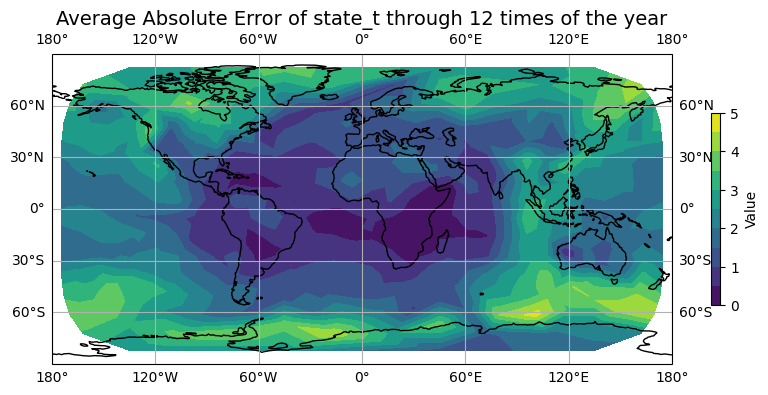

<Figure size 640x480 with 0 Axes>

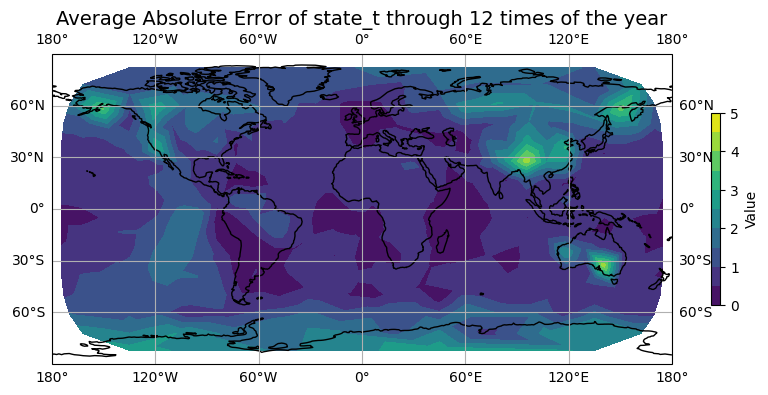

<Figure size 640x480 with 0 Axes>

In [84]:
plot_year_error_contour_map(preds_zero, vmin=0, vmax=5)
plot_year_error_contour_map(preds_trainall, vmin=0, vmax=5)


In [85]:
plot_year_error_contour_map(preds_zero, vmin=0, vmax=5, label="zero_model", save=True)
plot_year_error_contour_map(preds_trainall, vmin=0, vmax=5, label="train_all_lambdas", save=True)



<Figure size 640x480 with 0 Axes>

In [86]:
def plot_singletimeframe_contour_maps(n, test_set_index, vmin_error=None, vmax_error=None, vmin_temp=None, vmax_temp=None, label=None, save=False):
    y_pred = pd.DataFrame(n["y_pred"], columns=n["variables"])
    y_true = pd.DataFrame(n["y_true"], columns=n["variables"])
    error = abs(y_pred - y_true)

    file_basenames = n["file_basenames"]
    latitudes = n["latitudes"]
    longitudes = n["longitudes"]

    y_pred["file_basenames"] = file_basenames
    y_true["file_basenames"] = file_basenames
    error["file_basenames"] = file_basenames

    y_pred["latitudes"] = latitudes
    y_true["latitudes"] = latitudes
    error["latitudes"] = latitudes

    y_pred["longitudes"] = longitudes
    y_true["longitudes"] = longitudes

    error["longitudes"] = longitudes
    error["point_id"] = list(range(384))*12

    # get unique filenames
    unique_filenames = error["file_basenames"].unique()

    selected_filename = unique_filenames[test_set_index]

    # filter dataframes by selected_filename
    y_pred = y_pred[y_pred["file_basenames"] == selected_filename]
    y_true = y_true[y_true["file_basenames"] == selected_filename]
    error = error[error["file_basenames"] == selected_filename]

    # plot error, y_pred, y_true and save if needed
    if save:
        if label:
            ypred_basename = f'{label}_error_contour_map.png'
            ytrue_basename = f'{label}_y_true_contour_map.png'
            error_basename = f'{label}_y_pred_contour_map.png'
        else:
            ypred_basename = f'y_pred_contour_map.png'
            ytrue_basename = f'y_true_contour_map.png'
            error_basename = f'error_contour_map.png'

        plot_contour_map(y_pred["latitudes"], y_pred["longitudes"], y_pred["state_t"], title=f"Predicted state_t for {selected_filename}", vmin=vmin_temp, vmax=vmax_temp, save_path=f"{figures_folder}/{ypred_basename}")
        plot_contour_map(y_true["latitudes"], y_true["longitudes"], y_true["state_t"], title=f"True state_t for {selected_filename}", vmin=vmin_temp, vmax=vmax_temp, save_path=f"{figures_folder}/{ytrue_basename}")
        plot_contour_map(error["latitudes"], error["longitudes"], error["state_t"], title=f"Error for {selected_filename}", vmin=vmin_error, vmax=vmax_error, save_path=f"{figures_folder}/{error_basename}")
    else:
        plot_contour_map(y_pred["latitudes"], y_pred["longitudes"], y_pred["state_t"], title=f"Predicted state_t for {selected_filename}", vmin=vmin_temp, vmax=vmax_temp)
        plot_contour_map(y_true["latitudes"], y_true["longitudes"], y_true["state_t"], title=f"True state_t for {selected_filename}", vmin=vmin_temp, vmax=vmax_temp)
        plot_contour_map(error["latitudes"], error["longitudes"], error["state_t"], title=f"Error for {selected_filename}", vmin=vmin_error, vmax=vmax_error)

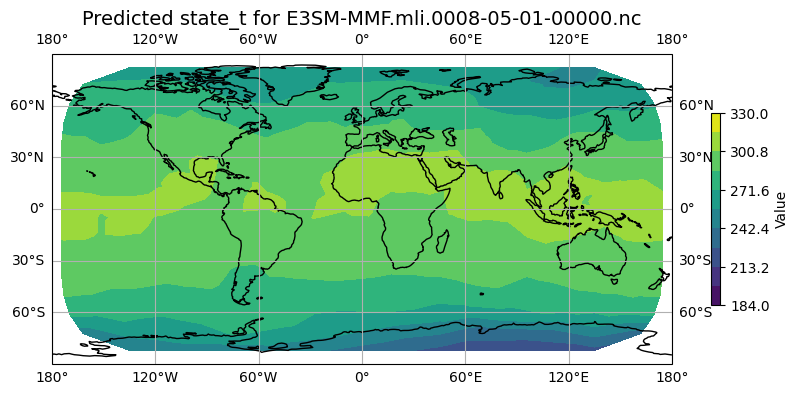

<Figure size 640x480 with 0 Axes>

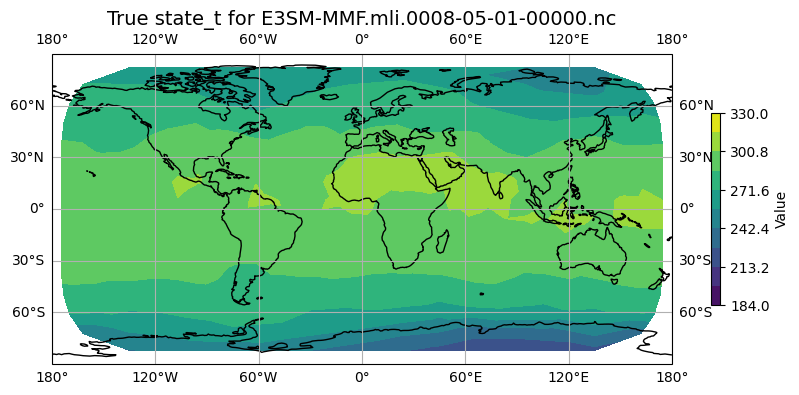

<Figure size 640x480 with 0 Axes>

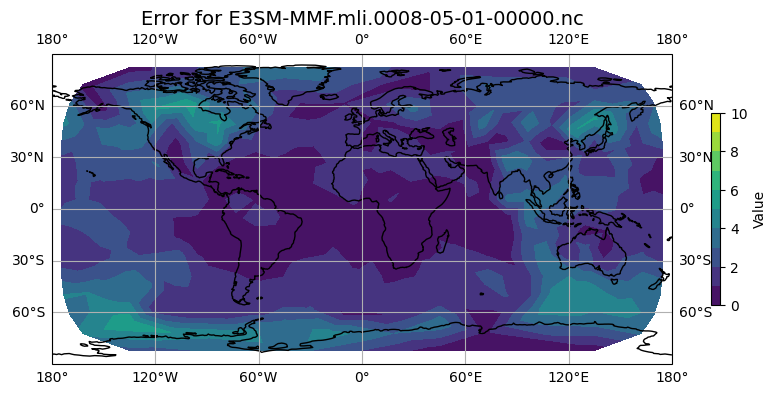

<Figure size 640x480 with 0 Axes>

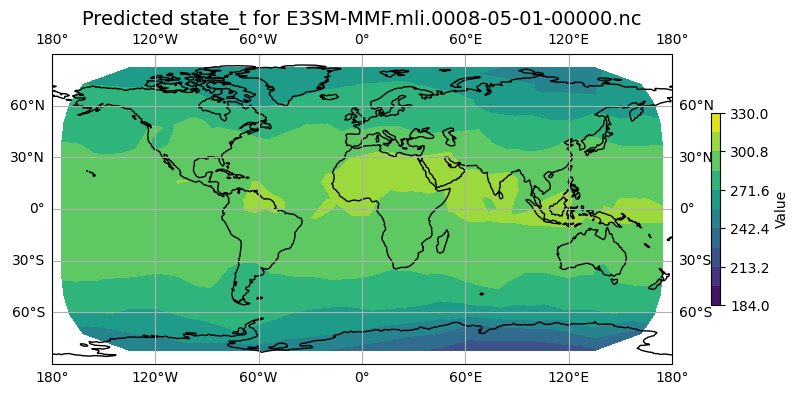

<Figure size 640x480 with 0 Axes>

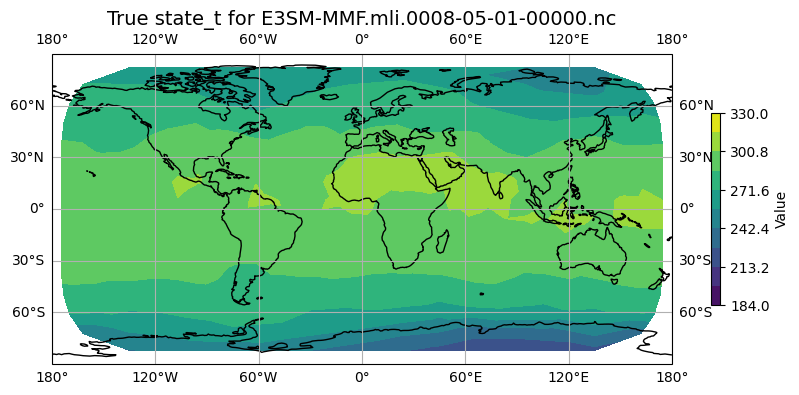

<Figure size 640x480 with 0 Axes>

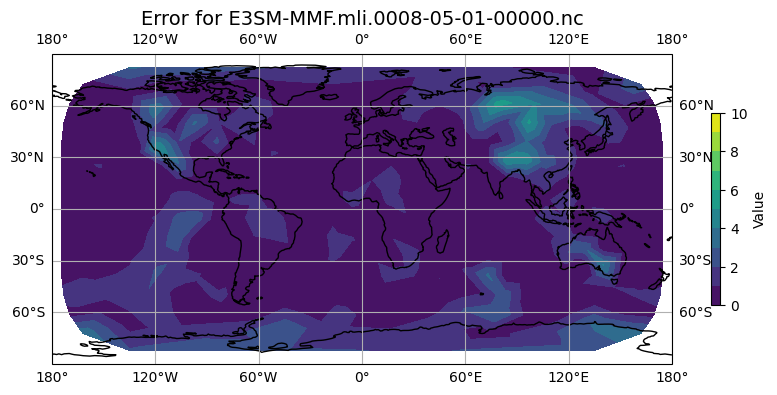

<Figure size 640x480 with 0 Axes>

In [87]:
# lowest temperature recorded is 184K, highest is 330K
plot_singletimeframe_contour_maps(preds_zero, 1, vmin_error=0, vmax_error=10, vmin_temp=184, vmax_temp=330, label="zero_model_file1")
plot_singletimeframe_contour_maps(preds_trainall, 1, vmin_error=0, vmax_error=10, vmin_temp=184, vmax_temp=330, label="train_all_lambdas_file1")

In [88]:
plot_singletimeframe_contour_maps(preds_zero, 1, vmin_error=0, vmax_error=10, vmin_temp=184, vmax_temp=330, label="zero_model_file1", save=True)
plot_singletimeframe_contour_maps(preds_trainall, 1, vmin_error=0, vmax_error=10, vmin_temp=184, vmax_temp=330, label="train_all_lambdas_file1", save=True)

<Figure size 640x480 with 0 Axes>